## Visualizing Apple's Stock Price Trend

 ### Data Columns Typically Include:
 
##### Open: Price at market open

##### High: Highest price of the day

##### Low: Lowest price of the day

##### Close: Price at market close

##### Volume: Number of shares traded



In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700
2024-01-03  183.150406  184.770683  182.335292  183.120586  58414500
2024-01-04  180.824356  181.997307  179.800504  181.062914  71983600
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500
2024-01-09  184.035080  184.045015  181.639459  182.822360  42841800
2024-01-10  185.078781  185.287519  182.822325  183.249766  46792900
2024-01-11  184.482391  185.933685  182.524147  185.426719  49128400
2024-01-12  184.810410  185.625523  184.084771  184.949573  40444700
2024-01-16  182.534073  183.160303  179.850175  181.072845  65603000

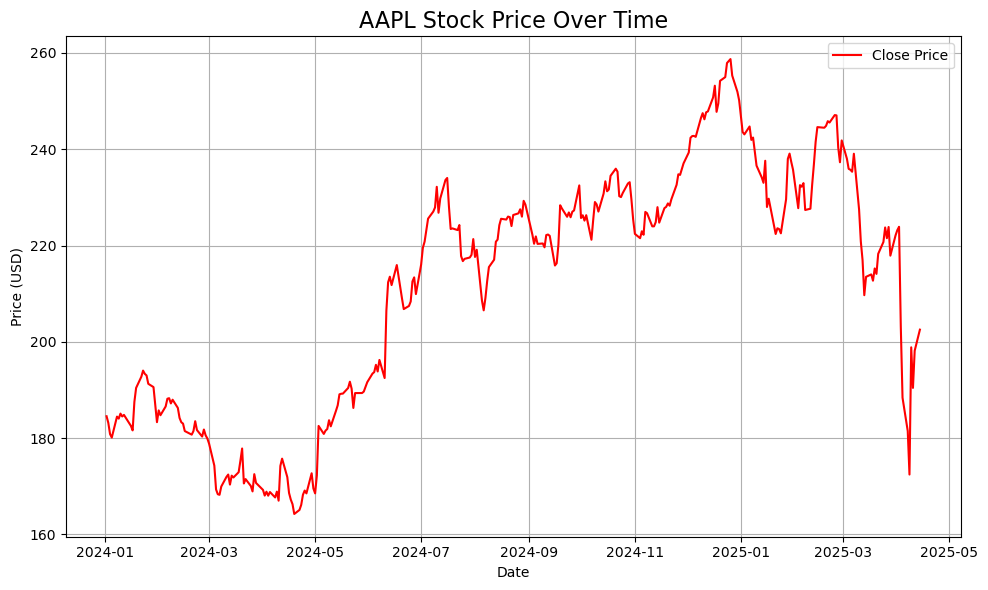

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='red')
plt.title('AAPL Stock Price Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## This code performs seasonal decomposition on the stock closing prices to break the time series into its fundamental components:

#### Original Series(first plot)

-This shows the actual closing stock price of AAPL over a time.

-The raw stock price data (stock_data['Close']).

#### Trend Component (second plot)

-Useful in understanding general behaviour of stock.

-Captures the long-term progression or direction in the data (e.g., upward or downward movement over time).


#### Seasonal Componenet(third plot)

-It capture cyclic behaviour in the stock.

-Identifies repeating patterns or cycles (e.g., monthly fluctuations, here defined using period=30 for approx. monthly seasonality).

#### Residual Component(fourth plot)

-Randon flucuation of data.

-The leftover noise or irregular component after removing trend and seasonality.



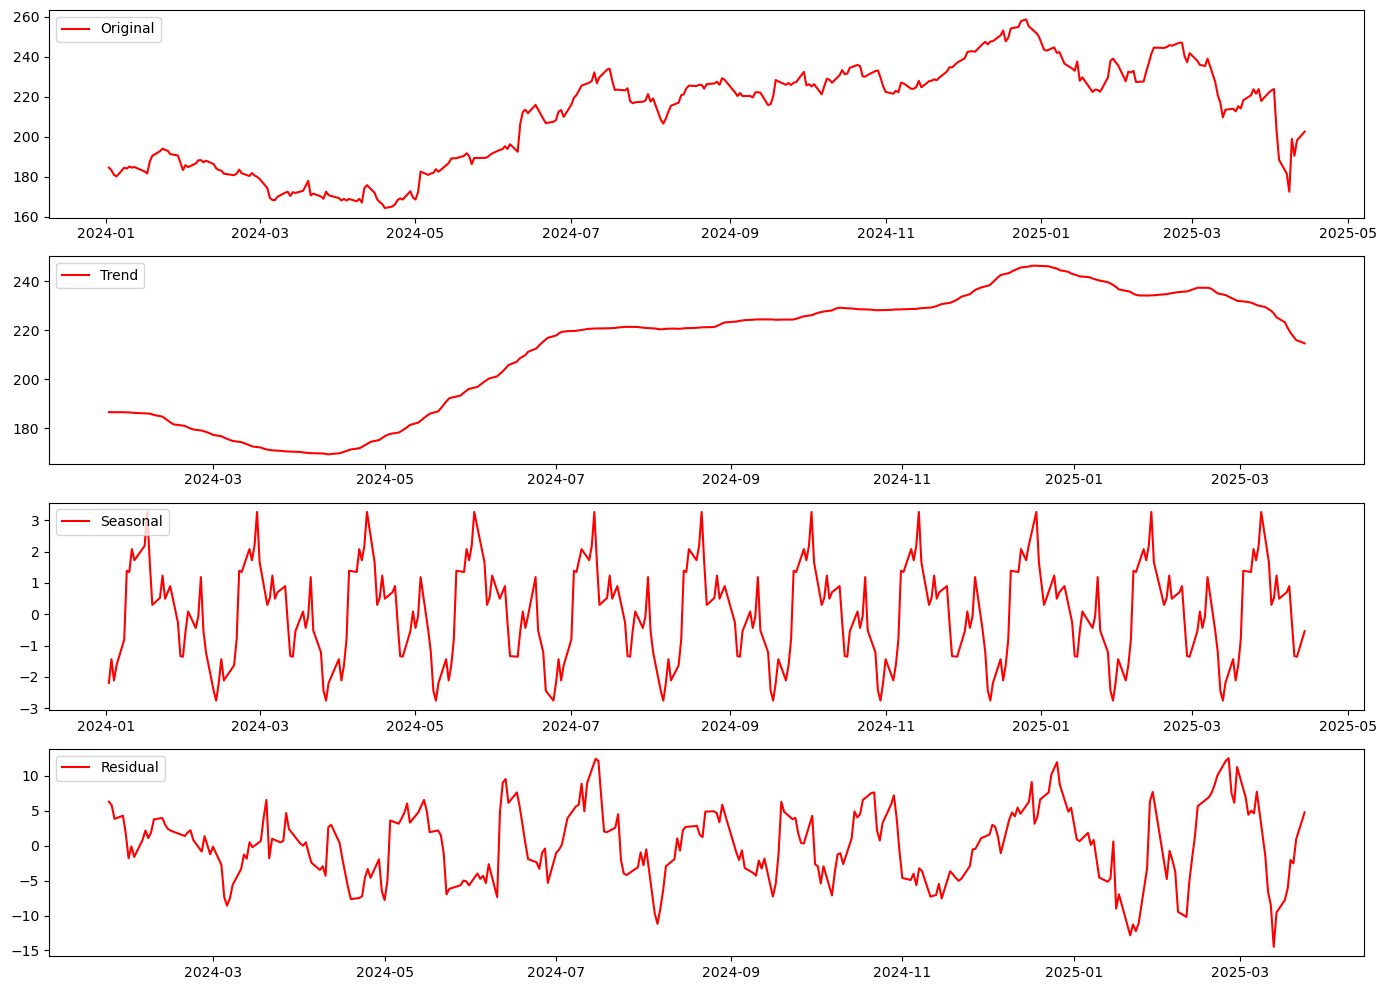

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time series decomposition
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

# Plotting the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='red')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='red')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


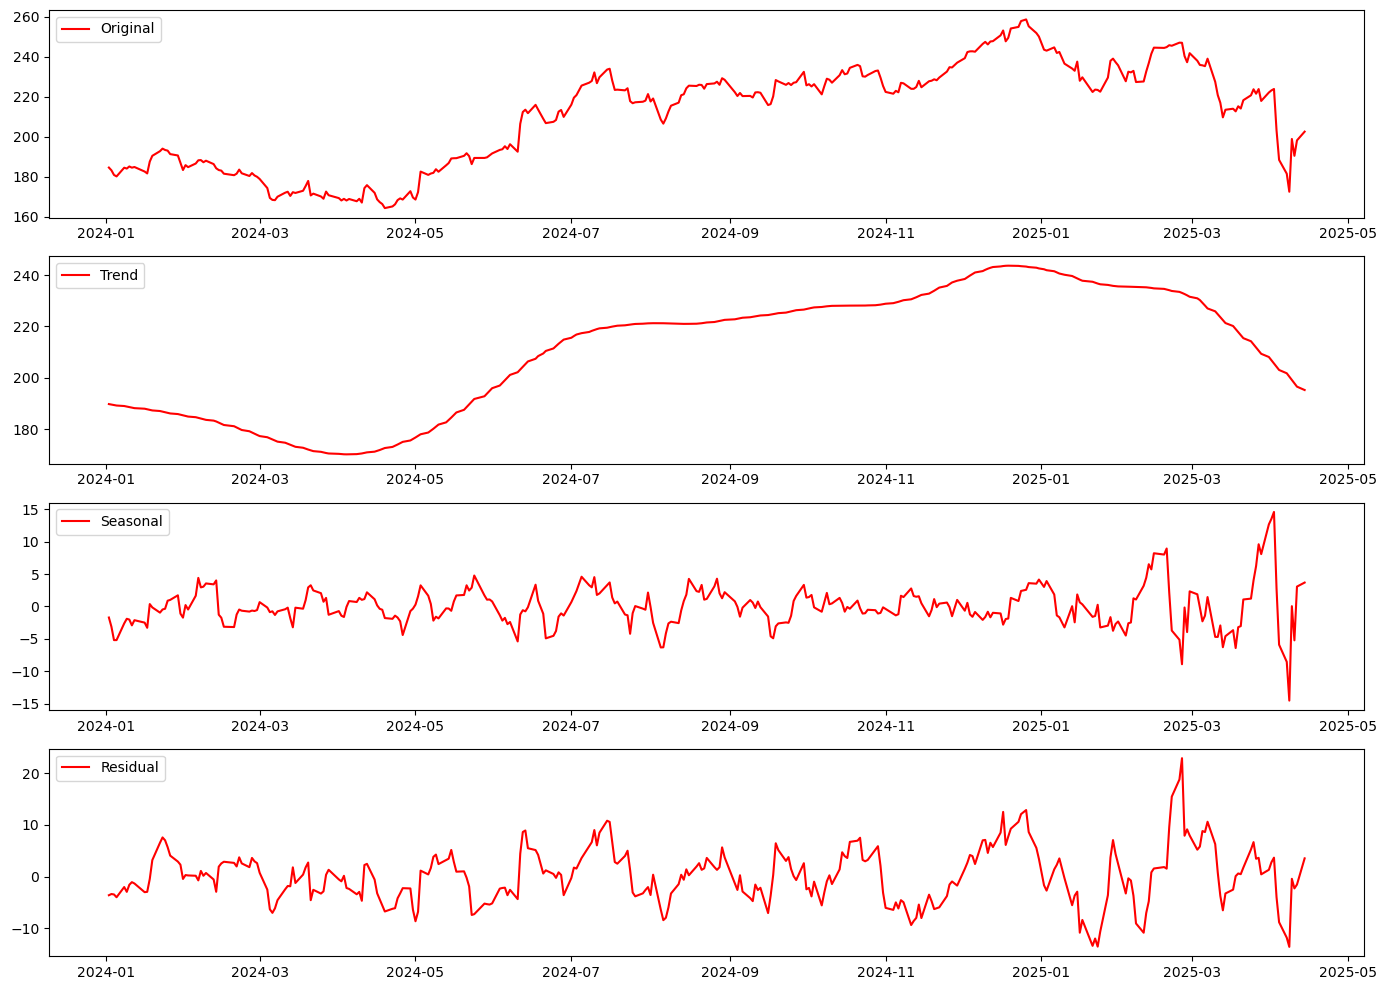

In [17]:
from statsmodels.tsa.seasonal import STL

# Performing STL decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

# Ploting the decomposition components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(result.observed, label='Original', color='red')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Augmented Dickey-Fuller (ADF) Test for Stationarity

#### The ADF test checks for the presence of a unit root in the data. If a unit root is present, the series is non-stationary. The test returns an ADF statistic, a p-value, and some critical values at different confidence levels. If the p-value is less than 0.05, we can say that the series is stationary (rejecting the null hypothesis of non-stationarity).

##### - If p-value < 0.05 → Reject the null hypothesis → The series is stationary.

##### - If ADF Statistic < Critical Value → Also suggests stationarity.



In [18]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value, 3)}')


ADF Test Results:
ADF Statistic: -1.542
p-value: 0.512
Critical Values:
   1%: -3.451
   5%: -2.871
   10%: -2.572


In [23]:
pip install numpy matplotlib scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


In [9]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
series = np.random.normal(0, 1, 500)


##  Kolmogorov-Smirnov (K-S) test to check if a time series is stationary

#### This code performs the Kolmogorov-Smirnov (K-S) test to check if a time series is stationary, meaning its statistical properties do not change over time.

##### - ks_2samp from scipy.stats is the Kolmogorov-Smirnov 2-sample test function
##### -np.random.seed(0) ensures the results are reproducible.

##### - np.random.normal(0, 1, 500) creates an array of 500 values from a normal distribution with mean = 0 and standard deviation = 1.

##### - If p-value > 0.05 → likely stationary (no significant change in distribution).

##### - If p-value < 0.05 → likely non-stationary (distribution has changed over time).


In [26]:
import numpy as np
from scipy.stats import ks_2samp

np.random.seed(0)
series = np.random.normal(0, 1, 500)

def ks_test_stationarity(series):
    split = len(series) // 2
    first_half = series[:split]
    second_half = series[split:]
    stat, p_value = ks_2samp(first_half, second_half)
    return stat, p_value

ks_stat, ks_pval = ks_test_stationarity(series)
print(f"K-S Statistic: {ks_stat}, p-value: {ks_pval}")


K-S Statistic: 0.068, p-value: 0.6109101078019121


K-S Statistic: 0.068, p-value: 0.6109101078019121


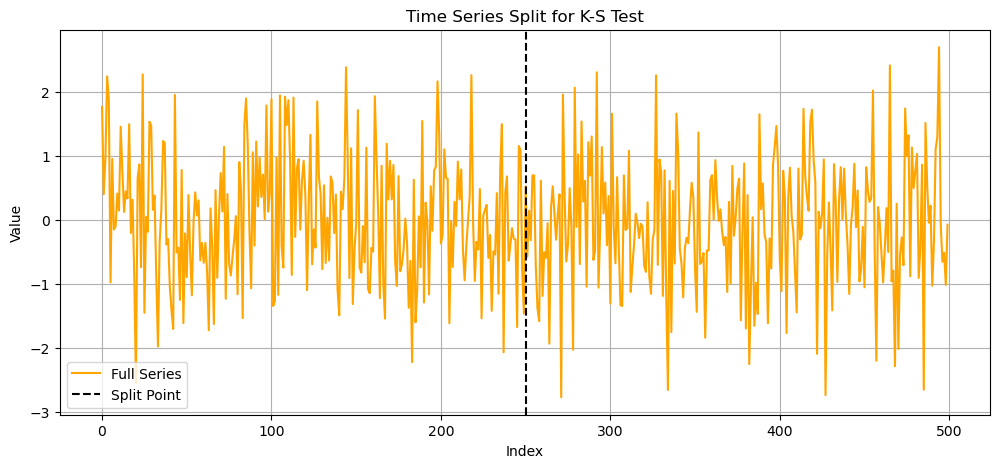

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Generating synthetic data
np.random.seed(0)
series = np.random.normal(0, 1, 500)

# K-S test function
def ks_test_stationarity(series):
    split = len(series) // 2
    first_half = series[:split]
    second_half = series[split:]
    stat, p_value = ks_2samp(first_half, second_half)
    return stat, p_value, first_half, second_half

# Runing the test
ks_stat, ks_pval, first_half, second_half = ks_test_stationarity(series)
print(f"K-S Statistic: {ks_stat}, p-value: {ks_pval}")


# Line plot of the time series with a split
plt.figure(figsize=(12, 5))
plt.plot(series, label='Full Series', color='orange')
plt.axvline(len(series)//2, color='black', linestyle='--', label='Split Point')
plt.title("Time Series Split for K-S Test")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



In [10]:
ks_stat, ks_pval, first_half, second_half = ks_test_stationarity(series)
print(f"K-S Statistic: {ks_stat}, p-value: {ks_pval}")


K-S Statistic: 0.068, p-value: 0.6109101078019121


In [11]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
adf_result = adfuller(series)
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Test Results:
ADF Statistic: -22.615506068552932
p-value: 0.0
Critical Values:
   1%: -3.4435228622952065
   5%: -2.867349510566146
   10%: -2.569864247011056


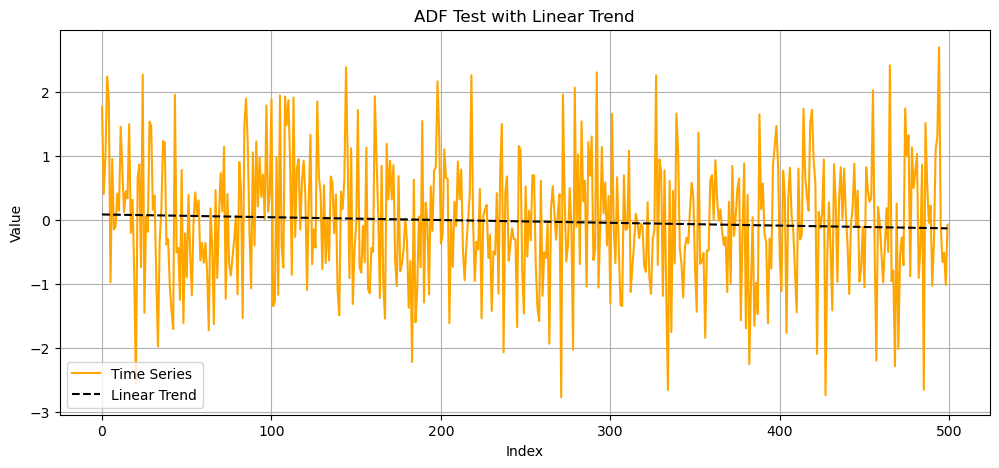

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generating synthetic data
np.random.seed(0)
series = np.random.normal(0, 1, 500)

# Performing ADF test
adf_result = adfuller(series)
adf_stat = adf_result[0]
p_val = adf_result[1]
crit_vals = adf_result[4]

# Linear trend line
x = np.arange(len(series))
z = np.polyfit(x, series, 1)  
trend = np.poly1d(z)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(series, label='Time Series', color='orange')
plt.plot(x, trend(x), label='Linear Trend', color='black', linestyle='--')
plt.title('ADF Test with Linear Trend')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()


plt.show()


## White Noise and Random Walk
## White Noise

#### The aim of this code is to simulate and analyze two fundamental time series patterns—White Noise and Random Walk—and assess their statistical properties using the Ljung-Box test.

#### At first we had ploted white which shows a time series consisting of completely random values with zero mean and constant variance. Each value is independent of the others, meaning there's no pattern or predictability.

##### -Key Characteristics:

##### No trend

##### No seasonality
##### No autocorrelation (i.e., past values do not influence future values)

## Random Walk- 

#### random walk is a time series where each value is the sum of the previous value and a random shock. It is non-stationary and highly dependent on its past values.

##### -Key Characteristics:

##### No fixed mean or variance

##### High autocorrelation

##### Difficult to predict future values accurately



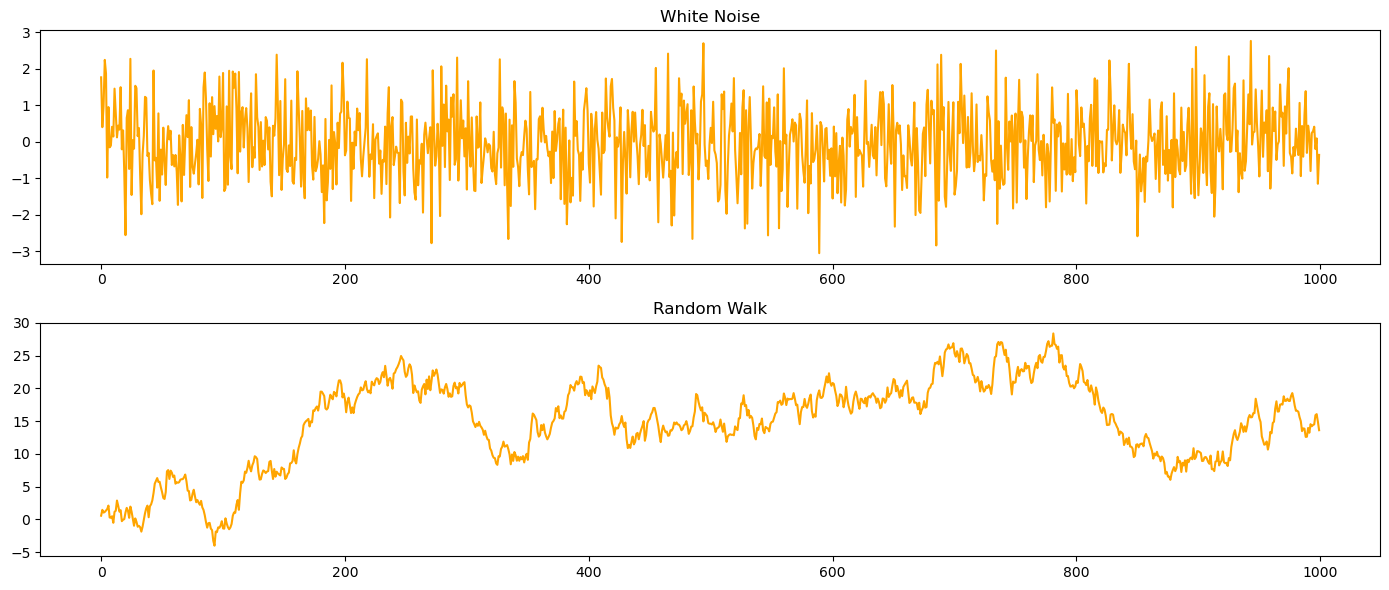


Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color='orange')
plt.title('White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color='orange')
plt.title('Random Walk')

plt.tight_layout()
plt.show()

# Ljung-Box test
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)





#### Here we prepare historical stock price data of Apple Inc for time series forecasting by transforming the data into a stationary format — a critical preprocessing step for many forecasting models such as ARIMA and also fitting ARIMA or SARIMA models for forecasting. Here we are featching the historical stock price data for Apple Inc. starting from January 1, 2023.

In [26]:
import yfinance as yf 
import pandas as pd

# Making data stationary before model fitting
stock_data = yf.download('AAPL', start='2023-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## Time Series Forecasting of Apple Stock Prices using AR Model

#### Here we have forcast short term changes in AAPL Inc. stock price and also build and evaluate an autoagrassive AR model. For tools and libraries we used pandas for manuplation, statsmodel for AR modeling, sklern for model evalution, matplotlib for ploting and visulizing. We then split the differenced series into training and testing sets and trained an AR model using the past 30 lagged observations. HereVisual plots demonstrated that the model was able to capture the general trend in the data.


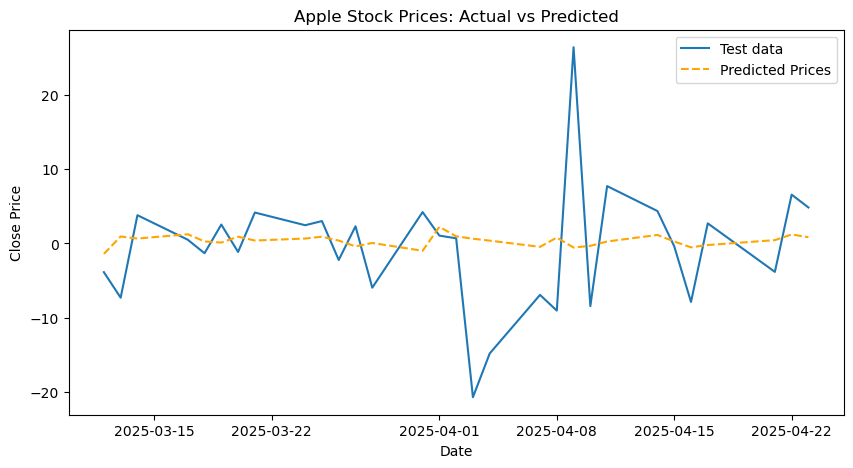

RMSE: 8.18


In [30]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt  
warnings.filterwarnings('ignore')

# Fiting the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()  

# Making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Ploting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='orange', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


## Moving Average Model (MA) 
#### In this code, a Moving Average (MA) model is applied to forecast Apple stock price movements using the ARIMA class from the statsmodels library. The MA model is specified using the order=(0, 0, 30) parameter, which indicates no autoregressive (p=0) or differencing (d=0) components, and a moving average.  The dynamic=False parameter ensures that the model uses actual historical data, not previous predictions, to make forecasts.  This implementation demonstrates a simple yet effective approach to time series forecasting using the MA component of ARIMA.



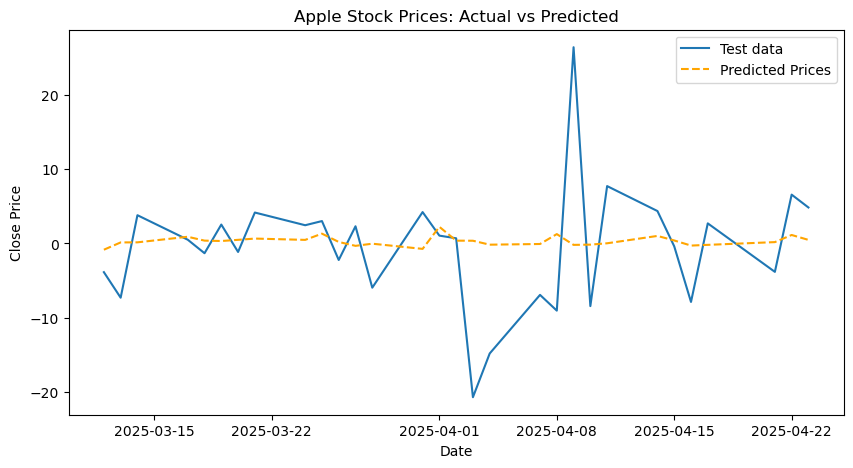

RMSE: 8.11


In [33]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Fiting the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0, 0, 30))
model_fit = model.fit()

# Making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Ploting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='orange', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


## ARMA (AutoRegressive Moving Average)
#### In this section, we implemented an ARMA (AutoRegressive Moving Average) model using the ARIMA class from the statsmodels library with the order (7, 0, 7). This configuration means:
##### p = 7 (AR part): The model uses the past 7 lagged values to predict the current value.
##### d = 0: No differencing is applied because the data is already made stationary beforehand.
##### q = 7 (MA part): The model also incorporates the past 7 lagged forecast errors.

#### We define and fit the ARMA model on the training dataset using the specified order. The .fit() method estimates the optimal model parameters and also We generate predictions on the test dataset. The start and end parameters ensure that the model makes predictions for the same length as the test set. Here we calculated the Root Mean Squared Error (RMSE) to evaluate model performance. A lower RMSE indicates better predictive accuracy.





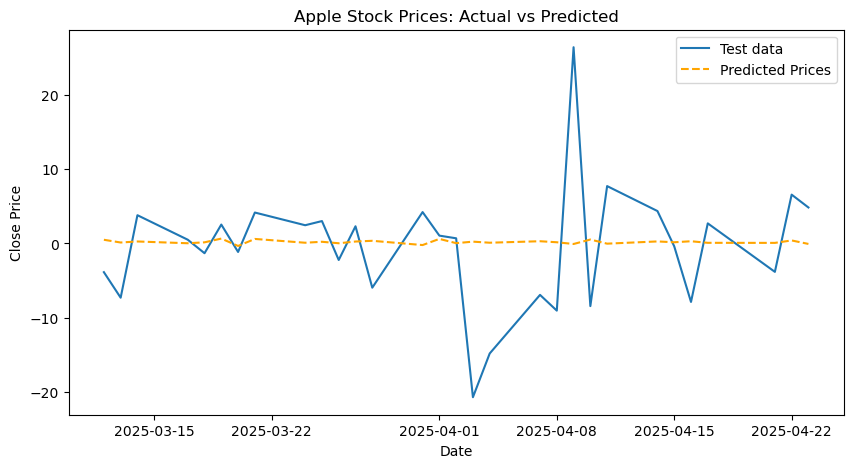

RMSE: 8.16


In [35]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fiting the ARMA model to the training data
model = ARIMA(train_data, order=(7, 0, 7))  # ARMA: p=7, d=0, q=7
model_fit = model.fit()

# Making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Ploting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='orange', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluate the model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


## ARIMA (AutoRegressive Integrated Moving Average) model

#### The code in this cell implements the ARIMA (AutoRegressive Integrated Moving Average) model, a powerful time series forecasting method that combines three components: autoregression (AR), differencing (I), and moving average (MA).
#### ARIMA(train_data, order=(7,1,7))

##### 7: The number of lag observations for the autoregressive (AR) part.
##### 1: The number of times the data is differenced to make it stationary (Integrated part).
##### 7: The number of lagged forecast errors in the moving average (MA) part.
#### RMSE (Root Mean Squared Error) is calculated to evaluate model performance.

#### Lower RMSE means better prediction accuracy. The result (printed) gives a quantitative idea of error between actual vs. predicted values.






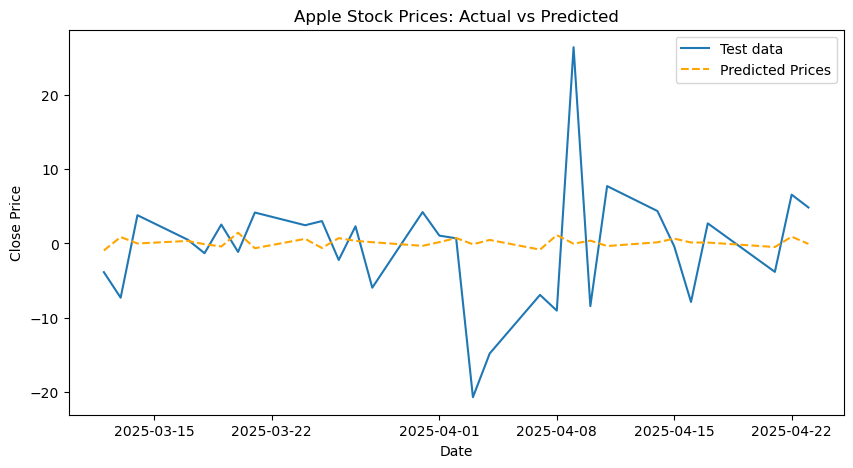

RMSE: 8.2


In [38]:
# Fiting the ARIMA model to the training data
model = ARIMA(train_data, order=(7, 1, 7))
model_fit = model.fit()

# Making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)

# Ploting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='orange', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print('RMSE:', rmse)


In [56]:

import yfinance as yf

tsla_data = yf.download('TSLA', start='2023-01-01')
aapl_data = yf.download('AAPL', start='2023-01-01')

# Creating a combined DataFrame
data = pd.DataFrame()
data['TSLA_Close'] = tsla_data['Close']
data['AAPL_Close'] = aapl_data['Close']

# Droping a missing values
data.dropna(inplace=True)

#  spliting into train/test
train_data, test_data = data[:-14], data[-14:]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [50]:
stock_data

TSLA_Close  AAPL_Close
Date                              
2023-01-03  108.099998  123.632530
2023-01-04  113.639999  124.907700
2023-01-05  110.339996  123.583107
2023-01-06  113.059998  128.130234
2023-01-09  119.769997  128.654144
...                ...         ...
2025-04-16  241.550003  194.270004
2025-04-17  241.369995  196.979996
2025-04-21  227.500000  193.160004
2025-04-22  237.970001  199.740005
2025-04-23  250.740005  204.600006

[578 rows x 2 columns]

## Vector Autoregression (VAR) model
#### This model is used to forecast the stock price of Tesla ('TSLA_Close') for the same period covered by the test set. The predictions are then converted into a pandas DataFrame, which allows easy comparison with the actual values from the test data.A plot is created to visually compare the actual Tesla stock prices (blue line) against the forecasted values (red line) over the test period

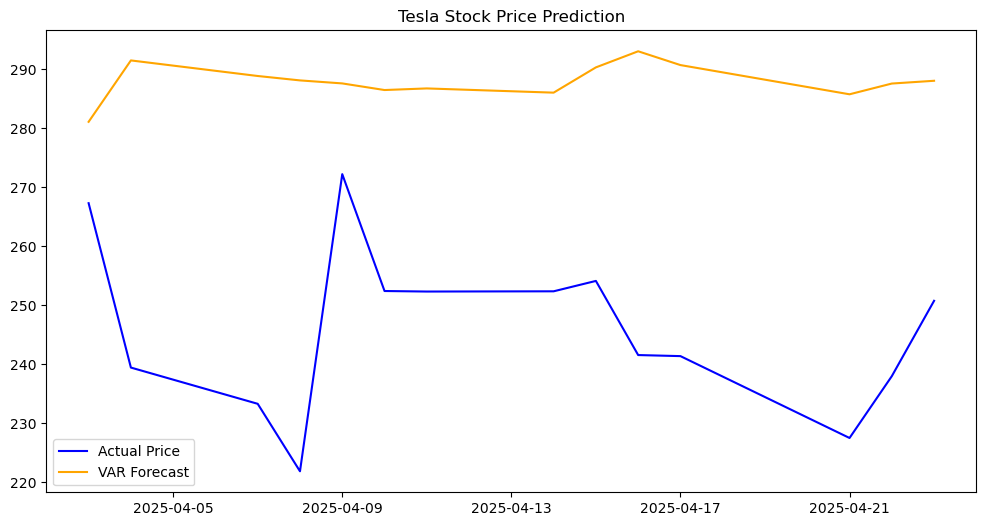

RMSE: 44.49


In [58]:
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Split data into training and testing
train_data, test_data = data[:-14], data[-14:]

# Fit VAR model
model = VAR(train_data)
result = model.fit(maxlags=27)

# Forecast
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

# Convert predictions to DataFrame
predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

# Plot Actual vs Forecast
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(predictions.index, predictions['TSLA_Close'], label='VAR Forecast', color='orange')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# RMSE Evaluation
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])), 2)
print('RMSE:', rmse)


#### Here we see about SMA, WMA, and EMA using your AAPL_Close column. These are smoothing techniques used in time series analysis to better understand trends by reducing noise. 
#### -rolling(window=window_size): Creates a rolling/sliding window over the data.
#### -mean(): Calculates the average within each window
#### -np.arange(1, window_size + 1): Creates weights like [1, 2, ..., 20].

#### -np.dot(prices, weights): Computes the weighted sum.

#### -weights.sum(): Divides by total weights to get the final average.
#### -ewm(span=window_size): Applies exponentially weighted moving average.

#### -mean(): Computes the EMA.

In [74]:
window_size = 20

# Calculate SMA
stock_data['SMA'] = stock_data['AAPL_Close'].rolling(window=window_size).mean()

# Calculate WMA
import numpy as np
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['AAPL_Close'].rolling(window_size).apply(
    lambda prices: np.dot(prices, weights)/weights.sum(), raw=True
)

# Calculate EMA
stock_data['EMA'] = stock_data['AAPL_Close'].ewm(span=window_size).mean()


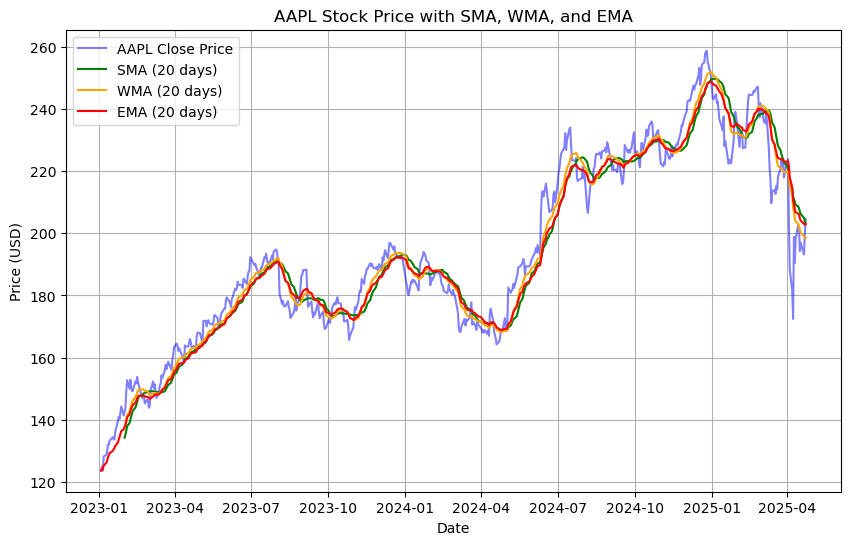

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(stock_data['AAPL_Close'], label='AAPL Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label='SMA (20 days)', color='green')
plt.plot(stock_data['WMA'], label='WMA (20 days)', color='orange')
plt.plot(stock_data['EMA'], label='EMA (20 days)', color='red')
plt.title('AAPL Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


# ACF AND PACF 

### Autocorrelation (ACF): Measures how a variable is correlated with its past values.

### Partial Autocorrelation (PACF): Measures the direct correlation between a variable and its lag, removing indirect effects.

### Plots the Autocorrelation of the Apple stock closing prices.

#### diff().diff():

##### First .diff() removes trend (i.e., converts to returns).

##### Second .diff() removes seasonality or any remaining structure.

##### .dropna(): removes any NaN values caused by differencing.

##### lags=50: Shows autocorrelations up to lag 50.

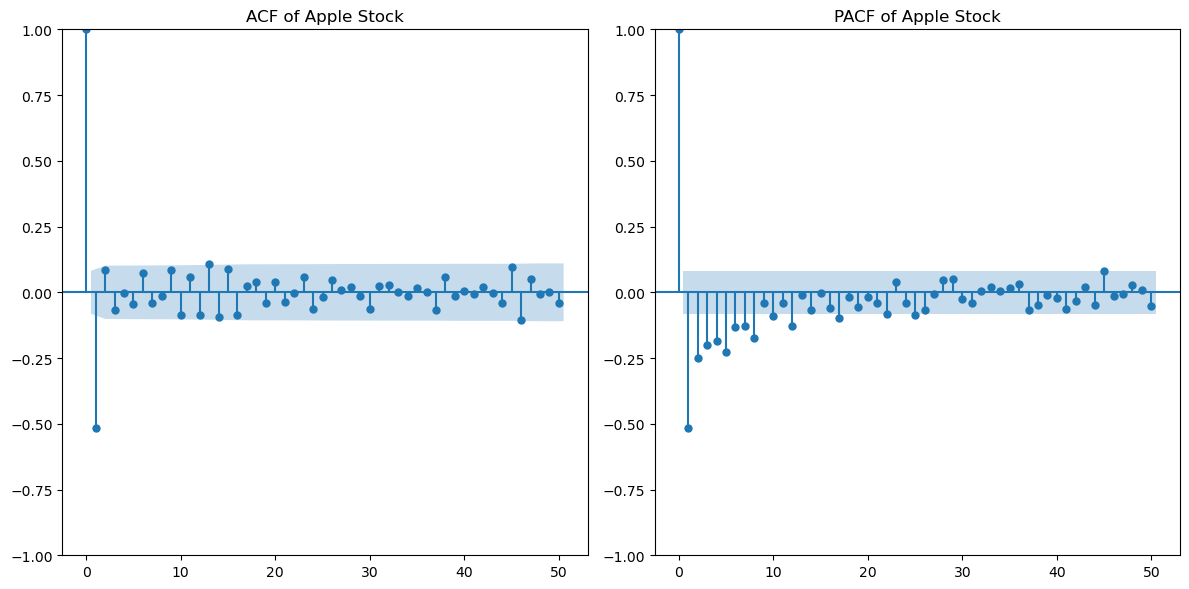

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# ACF Plot for AAPL
plt.subplot(1, 2, 1)
plot_acf(stock_data['AAPL_Close'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Apple Stock')

# PACF Plot for AAPL
plt.subplot(1, 2, 2)
plot_pacf(stock_data['AAPL_Close'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()


In [80]:
# Spliting the data into training and test sets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

# Fiting the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

# Making predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data) - 1,
    dynamic=False
)


In [82]:
mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100


In [85]:
import numpy as np
import pandas as pd

test_data = pd.Series(['100', '105', '110'])
predictions = np.array([98, 104, 111])

# Converting to float
test_data = test_data.astype(float)

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print("MAPE:", mape)


MAPE: 1.2871572871572872


## Explanation of Metrics:
#### -It measures average magnitude of error
#### - Treats all erors equally

#### MSE: Average squared difference (penalizes larger errors more).
#### - Emphasixing more on large error.
#### - Sensitive to outliers.

#### RMSE: Square root of MSE (same unit as the data).

#### MAPE: Average percentage error (good for interpretability).

#### AIC/BIC: Used to evaluate model quality (lower is better).

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

# AIC and BIC
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC): {bic}')


Mean Absolute Error (MAE): 1.3333333333333333
Mean Squared Error (MSE): 2.0
Root Mean Squared Error (RMSE): 1.4142135623730951
Mean Absolute Percentage Error (MAPE): 1.2871572871572872
Akaike Information Criterion (AIC): 2551.520320293683
Bayesian Information Criterion (BIC): 2687.457692277953
